#Download Dataset from Kaggle

In [1]:
 !pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 8.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=7c486dd7a5eeb84ea4ead2003f8609640b21a974ef0b0b02ebc059b82a2f0c59
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"petarvasiljevic","key":"dae47a988e82509cb90196d0de28fc56"}'}

In [38]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [42]:
!kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [43]:
!unzip flowers-recognition.zip -d flowers-recognition

Archive:  flowers-recognition.zip
replace flowers-recognition/flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace flowers-recognition/flowers/daisy/10140303196_b88d3d6cec.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
#For some reason, inside of flowers folder is additional flowers folder
import shutil
shutil.rmtree('flowers-recognition/flowers/flowers', ignore_errors=True)

#Import Libraries

In [44]:
import warnings
warnings.filterwarnings("ignore")

import os
import cv2

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.utils import to_categorical
from keras.applications import VGG16
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

#Load Dataset

In [45]:
print(os.listdir('flowers-recognition/flowers'))

['daisy', 'rose', 'tulip', 'sunflower', 'dandelion']


In [46]:
daisy_dir = 'flowers-recognition/flowers/daisy'
dandelion_dir = 'flowers-recognition/flowers/dandelion'
rose_dir = 'flowers-recognition/flowers/rose'
sunflower_dir = 'flowers-recognition/flowers/sunflower'
tulip_dir = 'flowers-recognition/flowers/tulip'

Load images

In [47]:
images = []
labels = []
img_size = 150
def get_image(dir, flower_name):
  for file_name in tqdm(os.listdir(dir)):
    try:
      path = os.path.join(dir, file_name)

      img = cv2.imread(path)
      img = cv2.resize(img, (img_size, img_size))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      images.append(np.array(img))
      labels.append(flower_name)
    except:
      print(path)

In [48]:
get_image(daisy_dir, 'Daisy')

100%|██████████| 769/769 [00:02<00:00, 378.33it/s]


In [49]:
get_image(dandelion_dir, 'Dandelion')

 24%|██▍       | 257/1055 [00:00<00:02, 319.89it/s]

flowers-recognition/flowers/dandelion/flickr.pyc


 45%|████▍     | 471/1055 [00:01<00:01, 352.70it/s]

flowers-recognition/flowers/dandelion/flickr.py


 83%|████████▎ | 876/1055 [00:02<00:00, 401.36it/s]

flowers-recognition/flowers/dandelion/run_me.py


100%|██████████| 1055/1055 [00:02<00:00, 364.26it/s]


In [50]:
get_image(rose_dir, 'Rose')

100%|██████████| 784/784 [00:02<00:00, 374.91it/s]


In [51]:
get_image(sunflower_dir, 'Sunflower')

100%|██████████| 734/734 [00:02<00:00, 315.18it/s]


In [52]:
get_image(tulip_dir, 'Tulip')

100%|██████████| 984/984 [00:02<00:00, 357.29it/s]


In [53]:
len(images)

4323

In [54]:
images = np.array(images)
labels = np.array(labels)

print('Input shape {}'.format(images.shape))
print('Output shape {}'.format(labels.shape))

Input shape (4323, 150, 150, 3)
Output shape (4323,)


Visualization of some images

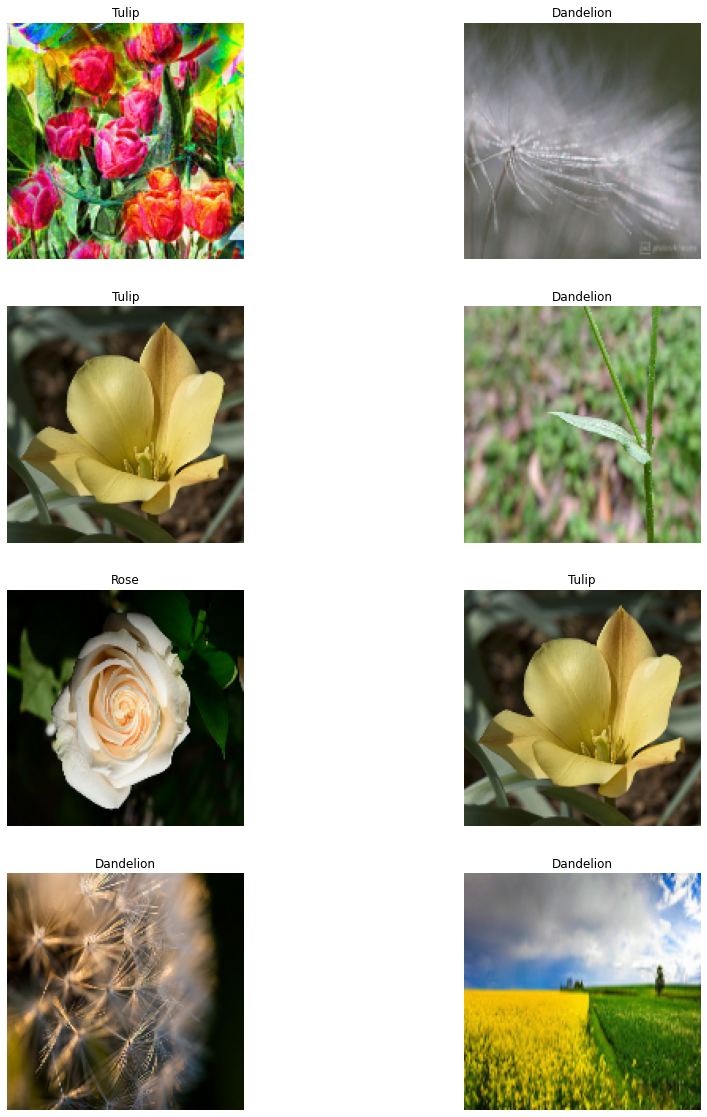

In [55]:
fig, axs = plt.subplots(4, 2, figsize = (15,20))
for i in range(4):
  for j in range(2):
    index_of_image = random.randint(0,len(images))
    axs[i, j].imshow(images[index_of_image])
    axs[i, j].set_title(labels[index_of_image])
    axs[i, j].axis('off')

Count of images for each class

Text(0, 0.5, 'Count')

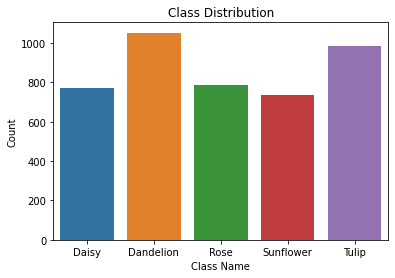

In [56]:
sns.countplot(labels)
plt.title("Class Distribution")
plt.xlabel("Class Name")
plt.ylabel("Count")

In [57]:
le = LabelEncoder()
y = le.fit_transform(labels)
#print(y)        #uncomment to see the difference
y = to_categorical(y, 5)
print(y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [58]:
#Normalize input data in range [0,1]
X = images/255  

Now, we have input X and output y

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [60]:
print('X_train shape {}'.format(X_train.shape))
print('y_train shape {}'.format(y_train.shape))
print('X_test shape {}'.format(X_test.shape))
print('y_test shape {}'.format(y_test.shape))

X_train shape (3458, 150, 150, 3)
y_train shape (3458, 5)
X_test shape (865, 150, 150, 3)
y_test shape (865, 5)


In [61]:
np.random.seed(42)
random.seed(42)

#Build model

In [62]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3), pooling='avg')
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [63]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Create actual model

In [72]:
model = Sequential()

model.add(base_model)
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 1285      
Total params: 14,847,301
Trainable params: 132,613
Non-trainable params: 14,714,688
_________________________________________________________________


In [73]:
base_model.trainable = False

In [74]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_delta=0.0001)

In [75]:
datagen = ImageDataGenerator(featurewise_center=False, 
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip = True,
                             vertical_flip=False
                             )

In [76]:
datagen.fit(X_train)

In [77]:
model.compile(
    optimizer=Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [78]:
batch_size = 64

history = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size),
    validation_data = (X_test, y_test),
    epochs = 50,
    verbose = 1,
    steps_per_epoch=X_train.shape[0] // batch_size
)

Epoch 1/50
54/54 [==============================] - 20s 351ms/step - loss: 1.7657 - accuracy: 0.2031 - val_loss: 1.4844 - val_accuracy: 0.4243
Epoch 2/50
54/54 [==============================] - 19s 347ms/step - loss: 1.4522 - accuracy: 0.4502 - val_loss: 1.3272 - val_accuracy: 0.5653
Epoch 3/50
54/54 [==============================] - 19s 345ms/step - loss: 1.3118 - accuracy: 0.5467 - val_loss: 1.1940 - val_accuracy: 0.6312
Epoch 4/50
54/54 [==============================] - 19s 351ms/step - loss: 1.1881 - accuracy: 0.5956 - val_loss: 1.1012 - val_accuracy: 0.6405
Epoch 5/50
54/54 [==============================] - 19s 346ms/step - loss: 1.1143 - accuracy: 0.6402 - val_loss: 1.0329 - val_accuracy: 0.6775
Epoch 6/50
54/54 [==============================] - 19s 346ms/step - loss: 1.0508 - accuracy: 0.6474 - val_loss: 0.9785 - val_accuracy: 0.6786
Epoch 7/50
54/54 [==============================] - 19s 346ms/step - loss: 0.9976 - accuracy: 0.6646 - val_loss: 0.9317 - val_accuracy: 0.7017

#Plot history

In [86]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Accuracy')

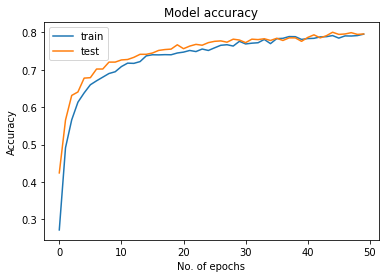

In [92]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.legend(['train','test'])
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

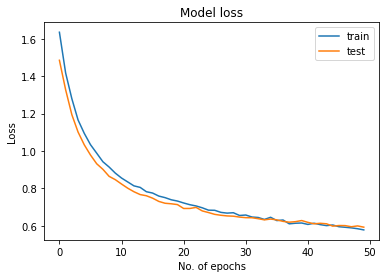

In [93]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Model loss')
plt.legend(['train','test'])
plt.xlabel('No. of epochs')
plt.ylabel('Loss')